In [1]:
# Reference: https://realpython.com/python-opencv-color-spaces/
import cv2
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
import sys
sys.path.append("../")

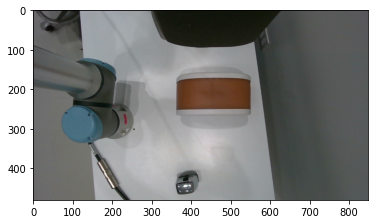

In [2]:
scene = cv2.imread("../InitialScene//InitialSceneDepth_RGB_Color.png")
scene = cv2.cvtColor(scene,cv2.COLOR_BGR2RGB) # OpenCV by default loads image in BGR format, a weird default.
plt.imshow(scene)

In [3]:
hsv_scene = cv2.cvtColor(scene,cv2.COLOR_RGB2HSV)

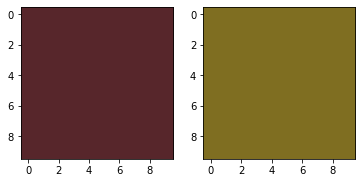

In [4]:
from matplotlib.colors import hsv_to_rgb,rgb_to_hsv
base_color_rgb = np.array((107, 64, 41))/255 # Get this value of the body using any color picker app on your OS.
hsv_radius = np.array([20,30,20])/255 # Tune the components of hsv_radius to capture as much body as possible. A smaller hsv_radius means the color range is smaller.

base_color_hsv = rgb_to_hsv(base_color_rgb)

lo_hsv = base_color_hsv-hsv_radius
hi_hsv = base_color_hsv+hsv_radius

lo_square = np.full((10, 10, 3),hsv_to_rgb(lo_hsv)*255)
hi_square = np.full((10, 10, 3),hsv_to_rgb(hi_hsv)*255)

plt.subplot(1, 2, 1)
plt.imshow(np.array(lo_square,dtype=np.int8))
plt.subplot(1, 2, 2)
plt.imshow(np.array(hi_square,dtype = np.int8))
plt.show()

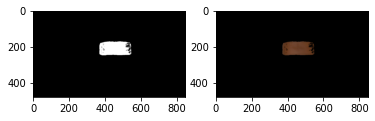

In [5]:
mask = cv2.inRange(hsv_scene,lo_hsv*255,hi_hsv*255)
assert np.any(mask)
result = cv2.bitwise_and(scene,scene,mask = mask)
plt.subplot(1,2,1)
plt.imshow(mask,cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(result)
plt.show()

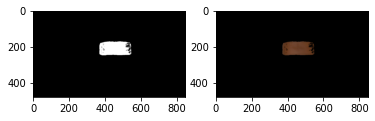

In [6]:
from SurfaceContact.scene import extractBodyPixels,normBodyCentroid
mask =  extractBodyPixels(scene)
result = cv2.bitwise_and(scene,scene,mask = mask)
plt.subplot(1,2,1)
plt.imshow(mask,cmap = 'gray')

plt.subplot(1,2,2)
plt.imshow(result)
plt.show()

In [7]:
normBodyCentroid(mask)

array([0.441752  , 0.53214861])